In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
url = 'https://datalakedtat.blob.core.windows.net/techchallenge3/bq-pnad-covid-9-10-11.csv'

In [3]:
df = pd.read_csv(url, sep=',', encoding='utf-8', engine='python')

In [4]:
df.head()

,Febre,dor_olhos,cheiro_sabor,dor_muscular,diarreia,tosse,dor_garganta,dificuldade_respiracao,dor_cabeca,dor_peito,...,restringiu_contato,tem_alcool,tem_mascara,idade,sexo,raca_cor,escolaridade,uf,mes,domicilio
0,2,2,2,2,2,2,2,2,2,2,...,3,1,1,18,2,1,5,AP,9,1
1,2,2,2,2,2,2,2,2,2,2,...,2,1,1,33,1,1,7,AP,9,1
2,2,2,2,2,2,2,2,2,2,2,...,3,1,1,13,2,4,2,AP,9,1
3,2,2,2,2,2,2,2,2,2,2,...,3,1,1,61,1,4,5,AP,9,1
4,2,2,2,2,2,2,2,2,2,2,...,2,1,1,18,1,4,4,AP,9,1


In [5]:
df.shape

(1149197, 30)

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149197 entries, 0 to 1149196
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Febre                   1149197 non-null  int64  
 1   dor_olhos               1149197 non-null  int64  
 2   cheiro_sabor            1149197 non-null  int64  
 3   dor_muscular            1149197 non-null  int64  
 4   diarreia                1149197 non-null  int64  
 5   tosse                   1149197 non-null  int64  
 6   dor_garganta            1149197 non-null  int64  
 7   dificuldade_respiracao  1149197 non-null  int64  
 8   dor_cabeca              1149197 non-null  int64  
 9   dor_peito               1149197 non-null  int64  
 10  nausea                  1149197 non-null  int64  
 11  nariz_ntupido           1149197 non-null  int64  
 12  fadiga                  1149197 non-null  int64  
 13  foi_estab_saude         1149197 non-null  float64
 14  en

In [8]:
df_copy = df.copy()

In [9]:
dfcolumns = df_copy.columns.tolist()
dfcolumns

['Febre',
 'dor_olhos',
 'cheiro_sabor',
 'dor_muscular',
 'diarreia',
 'tosse',
 'dor_garganta',
 'dificuldade_respiracao',
 'dor_cabeca',
 'dor_peito',
 'nausea',
 'nariz_ntupido',
 'fadiga',
 'foi_estab_saude',
 'entubado_resp_art',
 'plano_saude',
 'teste_swab',
 'teste_dedo',
 'teste_veia',
 'teste_positivo',
 'restringiu_contato',
 'tem_alcool',
 'tem_mascara',
 'idade',
 'sexo',
 'raca_cor',
 'escolaridade',
 'uf',
 'mes',
 'domicilio']

In [10]:
sintomas = df_copy.loc[:, ['Febre',
 'dor_olhos',
 'cheiro_sabor',
 'dor_muscular',
 'diarreia',
 'tosse',
 'dor_garganta',
 'dificuldade_respiracao',
 'dor_cabeca',
 'dor_peito',
 'nausea',
 'nariz_ntupido',
 'fadiga', 'teste_positivo']]

In [11]:
sintomas

,Febre,dor_olhos,cheiro_sabor,dor_muscular,diarreia,tosse,dor_garganta,dificuldade_respiracao,dor_cabeca,dor_peito,nausea,nariz_ntupido,fadiga,teste_positivo
0,2,2,2,2,2,2,2,2,2,2,2,2,2,não
1,2,2,2,2,2,2,2,2,2,2,2,2,2,não
2,2,2,2,2,2,2,2,2,2,2,2,2,2,não
3,2,2,2,2,2,2,2,2,2,2,2,2,2,não
4,2,2,2,2,2,2,2,2,2,2,2,2,2,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149192,2,2,2,2,2,2,2,2,2,2,2,2,2,não
1149193,2,2,2,2,2,2,2,2,2,2,2,2,2,não
1149194,2,2,2,2,2,2,2,2,2,2,2,2,2,não
1149195,2,2,2,2,2,2,2,2,2,2,2,2,2,não


In [12]:
df.loc[:, 'teste_positivo'].value_counts()

teste_positivo
não    1116275
sim      32922
Name: count, dtype: int64

In [13]:
df_testes = df.loc[:, 'teste_positivo'].count()
df_testes

1149197

In [14]:
df_testes_p = df['teste_positivo'].value_counts().get('sim', 0)
df_testes_p

32922

In [15]:
pct_positivo = df_testes_p * 100 / df_testes
pct_positivo

2.8647829745465745

In [16]:
df.loc[:, 'sexo'].value_counts()

sexo
2    598541
1    550656
Name: count, dtype: int64

In [17]:
df_copy['sexo'] = df_copy['sexo'].map({1: 'F', 2: 'M'})


1	Branca
2	Preta
3	Amarela
4	Parda
5	Indígena
9	Ignorado

In [18]:
df_copy['raca_cor'] = df_copy['raca_cor'].map({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 6: 'Ignorado'})

In [19]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 111]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','101-111']

# Criar a nova coluna com os grupos de idade
df_copy['faixa_etaria'] = pd.cut(df_copy['idade'], bins=bins, labels=labels, right=True)

In [20]:
df_copy.head()

,Febre,dor_olhos,cheiro_sabor,dor_muscular,diarreia,tosse,dor_garganta,dificuldade_respiracao,dor_cabeca,dor_peito,...,tem_alcool,tem_mascara,idade,sexo,raca_cor,escolaridade,uf,mes,domicilio,faixa_etaria
0,2,2,2,2,2,2,2,2,2,2,...,1,1,18,M,Branca,5,AP,9,1,0-20
1,2,2,2,2,2,2,2,2,2,2,...,1,1,33,F,Branca,7,AP,9,1,31-40
2,2,2,2,2,2,2,2,2,2,2,...,1,1,13,M,Parda,2,AP,9,1,0-20
3,2,2,2,2,2,2,2,2,2,2,...,1,1,61,F,Parda,5,AP,9,1,61-70
4,2,2,2,2,2,2,2,2,2,2,...,1,1,18,F,Parda,4,AP,9,1,0-20


<Axes: xlabel='sexo', ylabel='count'>

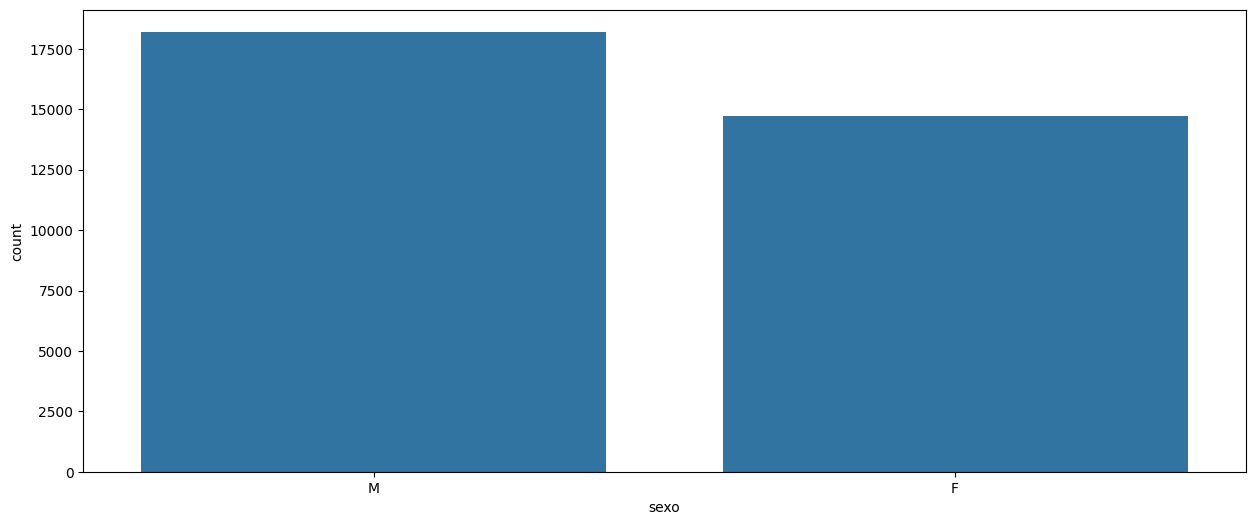

In [21]:
plt.figure(figsize=(15,6))
sb.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='sexo')

In [22]:
df_copy['faixa_etaria'] = pd.Categorical(
    df_copy['faixa_etaria'], 
    categories=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-111'], 
    ordered=True
)

<Axes: xlabel='faixa_etaria', ylabel='count'>

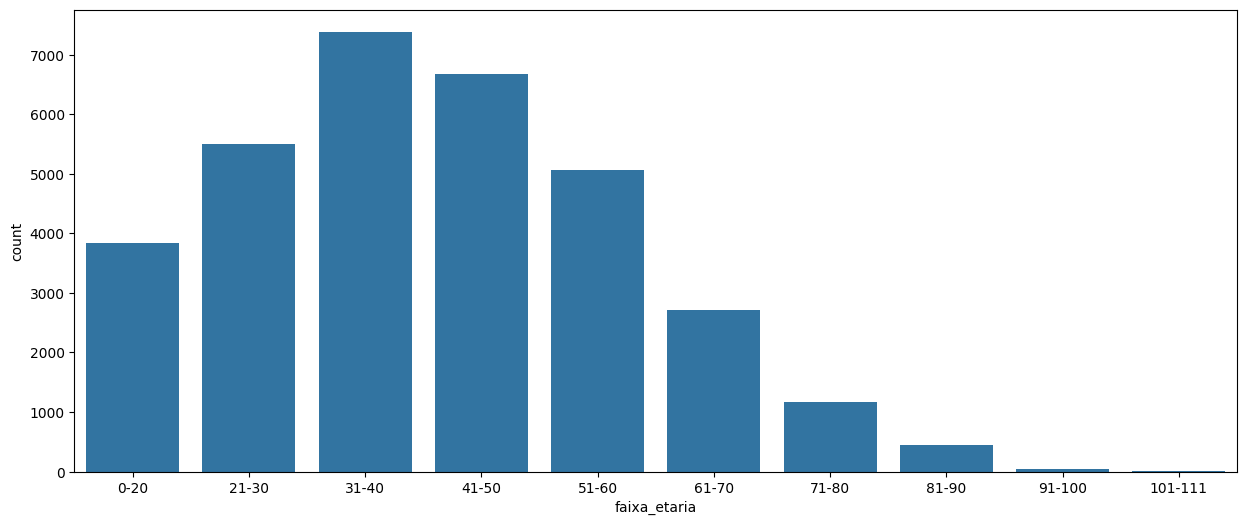

In [23]:
plt.figure(figsize=(15,6))
sb.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='faixa_etaria')

<Axes: xlabel='raca_cor', ylabel='count'>

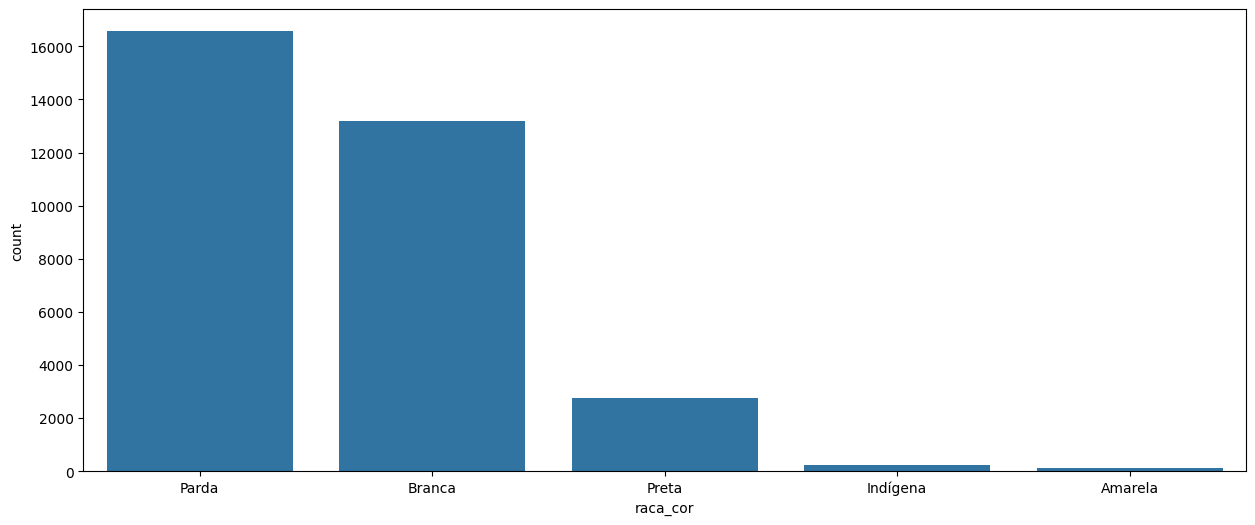

In [24]:
plt.figure(figsize=(15,6))
sb.countplot(data=df_copy[df_copy['teste_positivo'] == 'sim'], x='raca_cor')

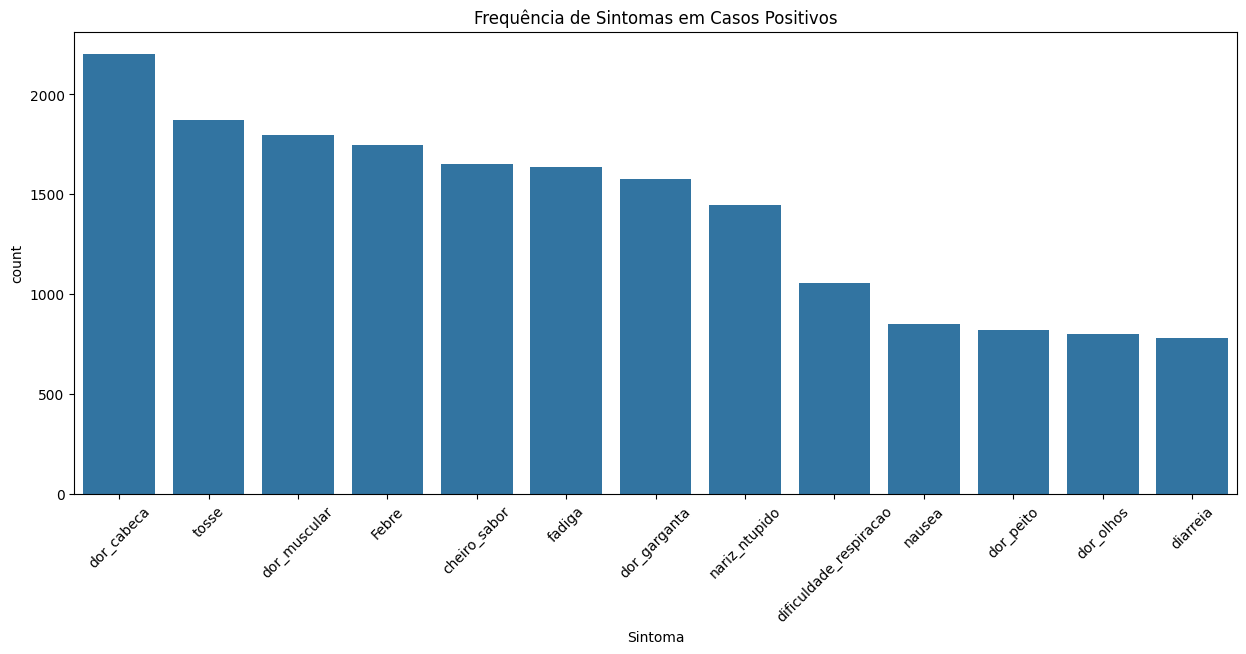

In [25]:
df_sintomas = sintomas[sintomas['teste_positivo'] == 'sim'].melt(
    id_vars=['teste_positivo'],
    value_vars=['Febre', 'dor_olhos', 'cheiro_sabor', 'dor_muscular', 
                'diarreia', 'tosse', 'dor_garganta', 'dificuldade_respiracao', 
                'dor_cabeca', 'dor_peito', 'nausea', 'nariz_ntupido', 'fadiga'], 
    var_name='Sintoma', 
    value_name='Presente'
)

df_sintomas = df_sintomas[df_sintomas['Presente'] == 1]

plt.figure(figsize=(15,6))
sb.countplot(data=df_sintomas, x='Sintoma', order=df_sintomas['Sintoma'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frequência de Sintomas em Casos Positivos')
plt.show()
